In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
                       

[*********************100%***********************]  1 of 1 completed


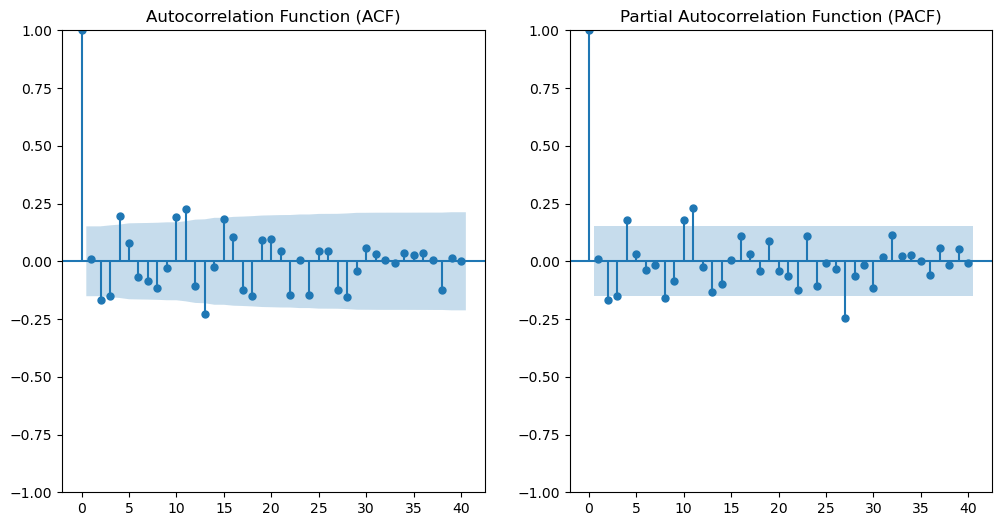

In [75]:
# Fetch the data from Yahoo Finance
ticker = 'TSLA'
data = yf.download(ticker, start='2010-01-01', end='2024-07-31', interval='1mo') # interval: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

# Keep only the 'Close' column
data = data['Close']
# Differencing to make the series stationary
data_diff = data.diff().dropna()
# ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data_diff, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.subplot(122)
plot_pacf(data_diff, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [76]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define the range for p, d, and q parameters
p_range = range(0, 6)  # Adjust for a broader search if needed
d_range = range(0, 2)
q_range = range(0, 6)

best_aic = np.inf
best_bic = np.inf
best_order = None
best_model = None
user_p_value_threshold = 0.05  # User-defined significance level for p-values

# Iterate through all combinations of p, d, and q
for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                model = ARIMA(data, order=(p, d, q)).fit()
                current_aic = model.aic
                current_bic = model.bic

                # Check if all terms are significant
                significant_terms = model.pvalues[model.pvalues < user_p_value_threshold].count() == len(model.pvalues)

                # Check if current model is better based on AIC and significant terms
                if current_aic < best_aic and significant_terms:
                    best_aic = current_aic
                    best_bic = current_bic
                    best_order = (p, d, q)
                    best_model = model
                    
                print(f"ARIMA({p},{d},{q}) - AIC: {current_aic}, BIC: {current_bic}, Significant Terms: {significant_terms}")
                
            except Exception as e:
                print(f"ARIMA({p},{d},{q}) failed: {e}")
                continue

# Output the best model found
if best_model is not None:
    print(f'\nBest ARIMA model: {best_order} with AIC: {best_aic} and BIC: {best_bic}')
else:
    print("No suitable ARIMA model found.")

ARIMA(0,0,0) - AIC: 2053.948625590052, BIC: 2060.208423019898, Significant Terms: True
ARIMA(0,0,1) - AIC: 1871.0042128395653, BIC: 1880.3939089843345, Significant Terms: True
ARIMA(0,0,2) - AIC: 1743.493355196515, BIC: 1756.0129500562073, Significant Terms: True
ARIMA(0,0,3) - AIC: 1699.33785413525, BIC: 1714.9873477098654, Significant Terms: True
ARIMA(0,0,4) - AIC: 1701.2746326176102, BIC: 1720.0540249071487, Significant Terms: False
ARIMA(0,0,5) - AIC: 1646.3489544240738, BIC: 1668.2582454285352, Significant Terms: True
ARIMA(0,1,0) - AIC: 1513.0326103353145, BIC: 1516.1565743147178, Significant Terms: True
ARIMA(0,1,1) - AIC: 1514.9921835741345, BIC: 1521.240111532941, Significant Terms: False
ARIMA(0,1,2) - AIC: 1513.5535477424382, BIC: 1522.925439680648, Significant Terms: False
ARIMA(0,1,3) - AIC: 1511.3884111876982, BIC: 1523.8842671053112, Significant Terms: False
ARIMA(0,1,4) - AIC: 1508.5129337570988, BIC: 1524.132753654115, Significant Terms: False
ARIMA(0,1,5) - AIC: 1510

In [77]:
# import numpy as np
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA

# # Define the range for p, d, and q parameters
# p_range = range(0, 6)  # You can adjust these ranges for a broader search
# d_range = range(0, 2)
# q_range = range(0, 6)

# best_aic = np.inf
# best_bic = np.inf
# best_order = None
# best_model = None

# # Iterate through all combinations of p, d, and q
# for p in p_range:
#     for d in d_range:
#         for q in q_range:
#             try:
#                 model = ARIMA(data, order=(p, d, q)).fit()
#                 current_aic = model.aic
#                 current_bic = model.bic
                
#                 # Check if current model is better based on AIC
#                 if current_aic < best_aic:
#                     best_aic = current_aic
#                     best_bic = current_bic
#                     best_order = (p, d, q)
#                     best_model = model
                    
#                 print(f"ARIMA({p},{d},{q}) - AIC: {current_aic}, BIC: {current_bic}")
                
#             except Exception as e:
#                 print(f"ARIMA({p},{d},{q}) failed: {e}")
#                 continue

# # Output the best model found
# if best_model is not None:
#     print(f'\nBest ARIMA model: {best_order} with AIC: {best_aic} and BIC: {best_bic}')
# else:
#     print("No suitable ARIMA model found.")

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  169
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -741.585
Date:                Sat, 21 Sep 2024   AIC                           1493.169
Time:                        23:41:51   BIC                           1508.789
Sample:                    07-01-2010   HQIC                          1499.508
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7394      0.025     30.088      0.000       0.691       0.788
ar.L2         -0.9625      0.025    -38.485      0.000      -1.011      -0.913
ma.L1         -0.8887      0.093     -9.558      0.0

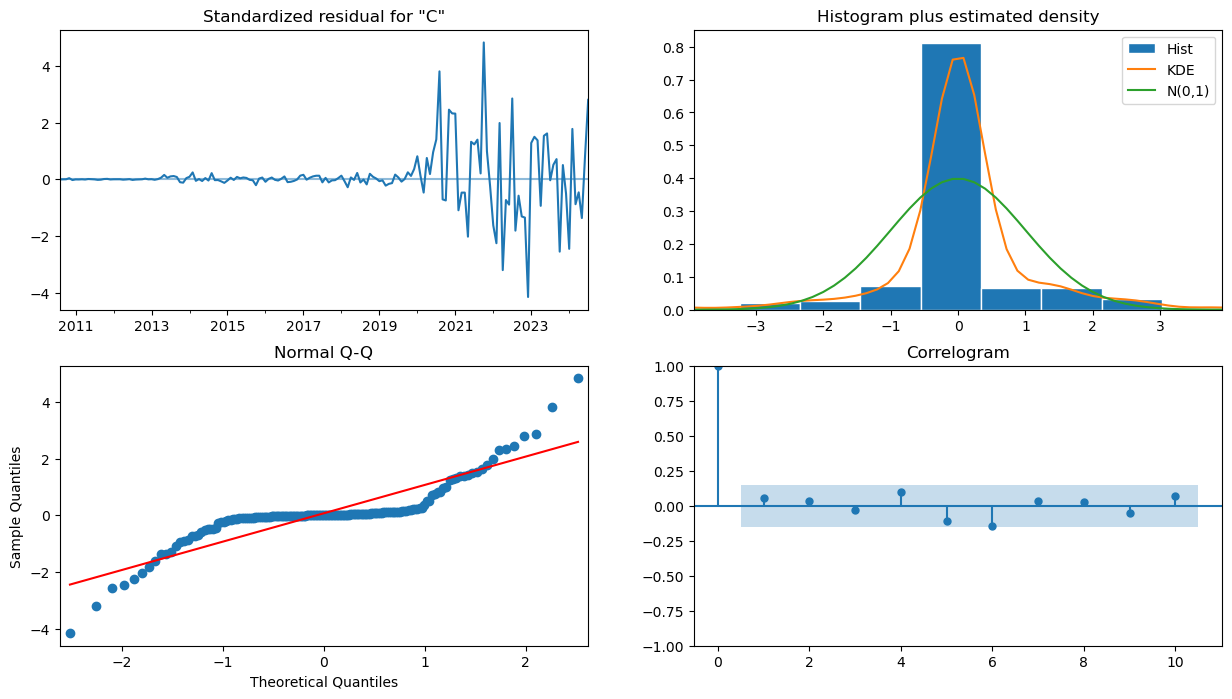

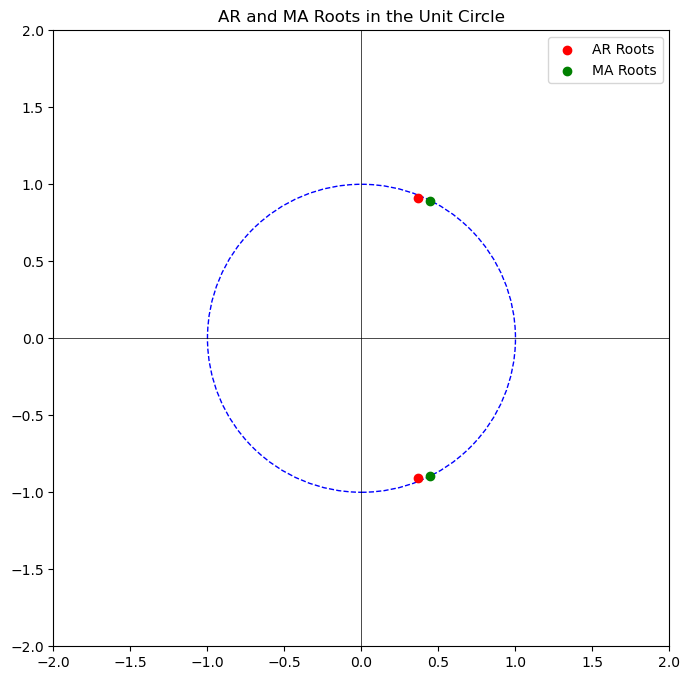

In [78]:
    
# Display statistical results of the best ARIMA model
if best_model is not None:
    print(best_model.summary())
    print(best_model.plot_diagnostics(figsize=(15,8)))

# Plot AR and MA roots in the unit circle
if best_model is not None and best_order[0] > 0: # Only plot if AR or MA parameters
    ar_params = np.r_[1, -best_model.arparams] if best_order[0] > 0 else [1]
    ma_params = np.r_[1, best_model.maparams] if best_order[2] > 0 else [1]
    ar_roots = np.roots(ar_params)
    ma_roots = np.roots(ma_params)
    plt.figure(figsize=(8, 8))
    unit_circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
    plt.gca().add_patch(unit_circle)
    plt.scatter(ar_roots.real, ar_roots.imag, color='red', label='AR Roots')
    plt.scatter(ma_roots.real, ma_roots.imag, color='green', label='MA Roots')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('AR and MA Roots in the Unit Circle')
    plt.legend()
    plt.show()
    


ADF Statistic: -2.849802330399968
p-value: 0.05150444956029698


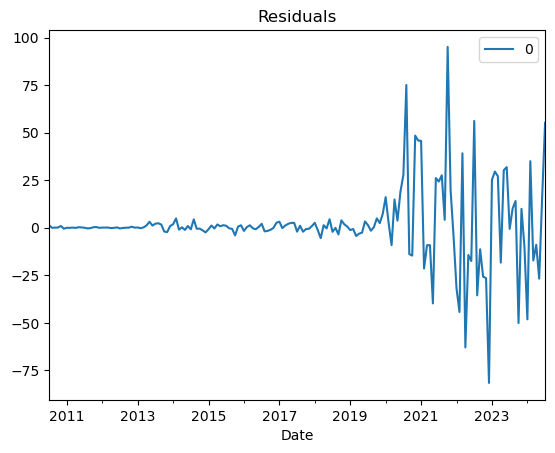

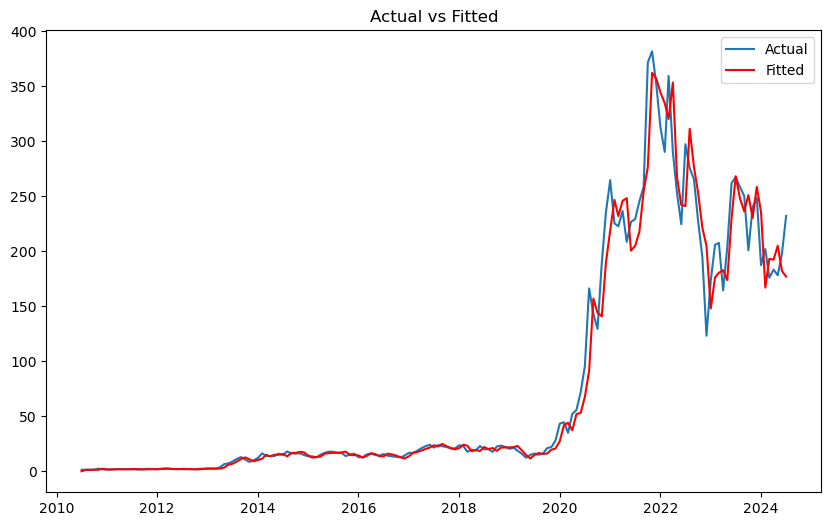

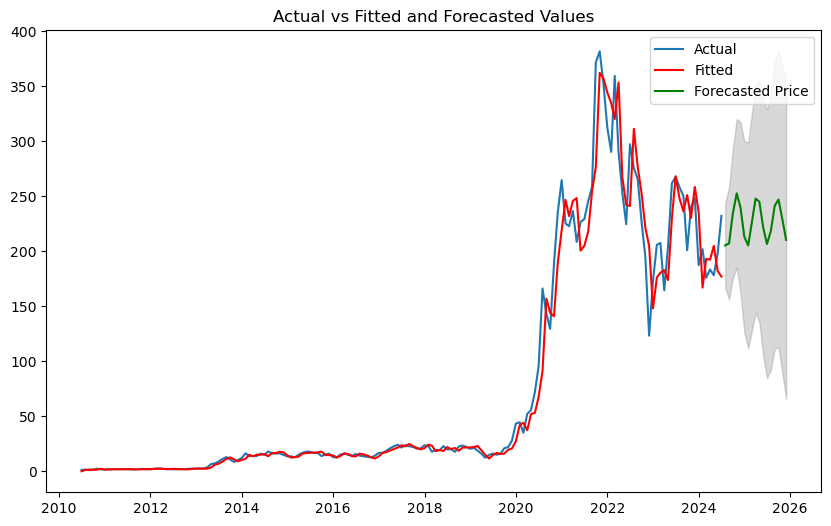

In [79]:
# Unit Root Graph (ADF Test)
adf_test = sm.tsa.adfuller(data_diff)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
# Residuals Plot
if best_model is not None:
    residuals = pd.DataFrame(best_model.resid)
    residuals.plot(title="Residuals")
    plt.show()
    # Actual vs Forecast
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Actual')
    plt.plot(best_model.fittedvalues, color='red', label='Fitted')
    plt.legend()
    plt.title('Actual vs Fitted')
    plt.show()
    # Forecasting until the end of 2025
    forecast_steps = 17 # Number of months from August 2024 to December 2025
    forecast = best_model.get_forecast(steps=forecast_steps)
    # Adjust forecast_index to match the length of forecast.predicted_mean
    forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps, freq='M')
    # Plot Actual vs Forecast
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Actual')
    plt.plot(best_model.fittedvalues, color='red', label='Fitted')
    plt.plot(forecast_index, forecast.predicted_mean, color='green', label='Forecasted Price')
    plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='gray', alpha=0.3)
    plt.legend()
    plt.title('Actual vs Fitted and Forecasted Values')
    plt.show()
else:
    print("Skipping residual and forecast plots since no model was fitted.")

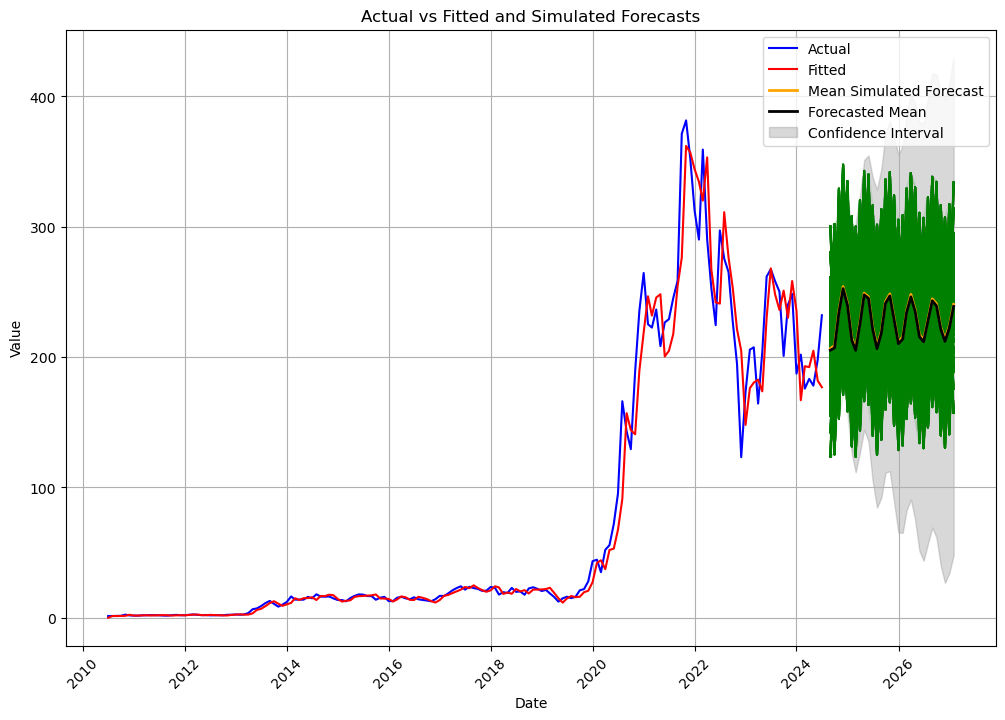

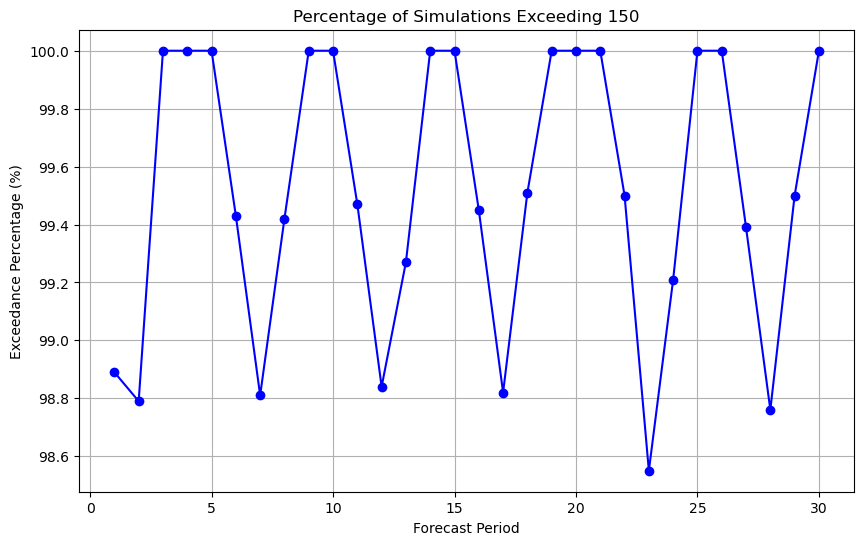

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to simulate forecasts
def simulate_arima_predictions(best_model, num_simulations, forecast_periods, threshold):
    # Forecast for the specified periods
    forecast = best_model.get_forecast(steps=forecast_periods)
    forecast_mean = forecast.predicted_mean
    forecast_se = forecast.se_mean  # Standard errors of the forecast
    
    # Extract residuals from the best model
    residuals = best_model.resid

    # Simulate the forecast num_simulations times using residuals
    simulations = []
    for i in range(num_simulations):
        # Sample from the residuals with replacement
        simulated_values = forecast_mean + np.random.choice(residuals, size=forecast_periods, replace=True)
        simulations.append(simulated_values)
    
    simulations = np.array(simulations)
    
    # Calculate the percentage of simulations exceeding the threshold
    exceed_percentages = (simulations > threshold).mean(axis=0) * 100
    
    # Create a DataFrame for easy viewing of simulations and percentages
    simulation_df = pd.DataFrame(simulations, columns=[f"Period {i+1}" for i in range(forecast_periods)])
    exceed_df = pd.DataFrame({"Period": range(1, forecast_periods + 1), "Exceed %": exceed_percentages})
    
    return simulation_df, exceed_df

# Example usage
num_simulations = 10000
forecast_periods = 30
threshold_value = 150

if best_model is not None:
    # Simulate forecasts
    simulation_df, exceed_df = simulate_arima_predictions(best_model, num_simulations, forecast_periods, threshold_value)

    # Plot Actual, Fitted, and Simulated Forecasts
    forecast = best_model.get_forecast(steps=forecast_periods)
    forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=forecast_periods, freq='M')
    
    plt.figure(figsize=(12, 8))
    plt.plot(data, label='Actual', color='blue')
    plt.plot(best_model.fittedvalues, color='red', label='Fitted')

    # Plot simulated forecasts
    for i in range(simulation_df.shape[0]):  # For each simulation
        plt.plot(forecast_index, simulation_df.iloc[i], color='green', alpha=0.1)  # Light color for simulations

    # Plot the mean of simulated forecasts
    mean_simulation = simulation_df.mean(axis=0)
    plt.plot(forecast_index, mean_simulation, color='orange', label='Mean Simulated Forecast', linewidth=2)

    conf_int = forecast.conf_int()
    plt.plot(forecast_index, forecast.predicted_mean, color='black', label='Forecasted Mean', linewidth=2)
    plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

    plt.legend()
    plt.title('Actual vs Fitted and Simulated Forecasts')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

    # Plot exceed percentages over the forecast periods
    plt.figure(figsize=(10, 6))
    plt.plot(exceed_df['Period'], exceed_df['Exceed %'], marker='o', linestyle='-', color='blue')
    plt.title(f'Percentage of Simulations Exceeding {threshold_value}')
    plt.xlabel('Forecast Period')
    plt.ylabel('Exceedance Percentage (%)')
    plt.grid(True)
    plt.show()
else:
    print("No suitable ARIMA model found.")

[*********************100%***********************]  1 of 1 completed


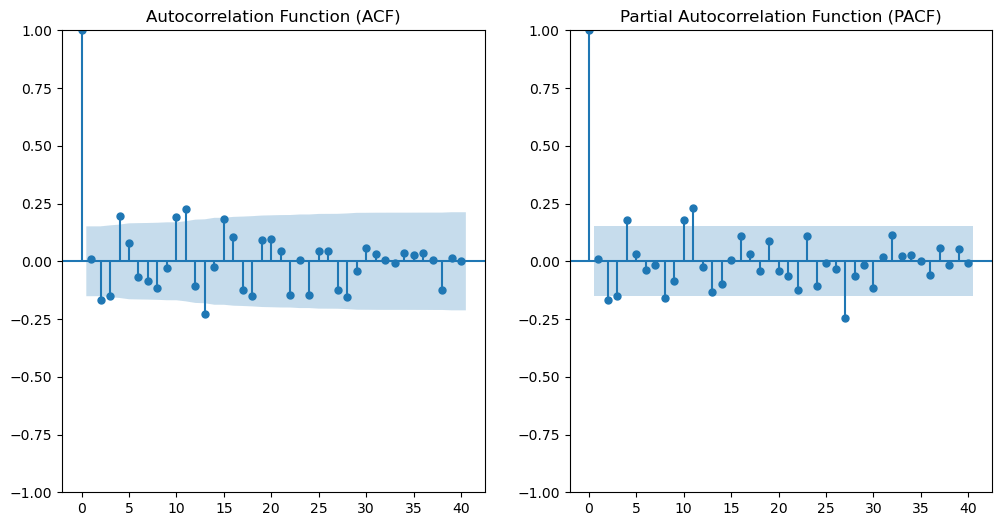

ARIMA(0,0,0) - AIC: 2053.948625590052, BIC: 2060.208423019898, Significant Terms: True
ARIMA(0,0,1) - AIC: 1871.0042128395653, BIC: 1880.3939089843345, Significant Terms: True
ARIMA(0,0,2) - AIC: 1743.493355196515, BIC: 1756.0129500562073, Significant Terms: True
ARIMA(0,0,3) - AIC: 1699.33785413525, BIC: 1714.9873477098654, Significant Terms: True
ARIMA(0,0,4) - AIC: 1701.2746326176102, BIC: 1720.0540249071487, Significant Terms: False
ARIMA(0,0,5) - AIC: 1646.3489544240738, BIC: 1668.2582454285352, Significant Terms: True
ARIMA(0,1,0) - AIC: 1513.0326103353145, BIC: 1516.1565743147178, Significant Terms: True
ARIMA(0,1,1) - AIC: 1514.9921835741345, BIC: 1521.240111532941, Significant Terms: False
ARIMA(0,1,2) - AIC: 1513.5535477424382, BIC: 1522.925439680648, Significant Terms: False
ARIMA(0,1,3) - AIC: 1511.3884111876982, BIC: 1523.8842671053112, Significant Terms: False
ARIMA(0,1,4) - AIC: 1508.5129337570988, BIC: 1524.132753654115, Significant Terms: False
ARIMA(0,1,5) - AIC: 1510

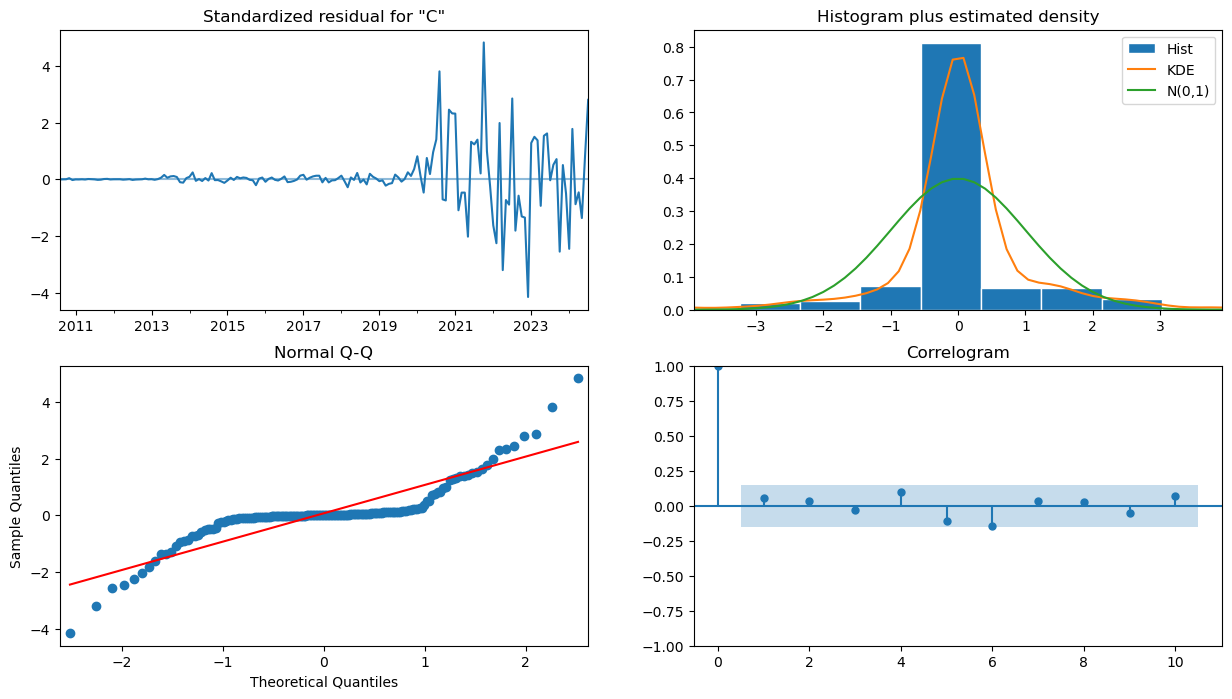

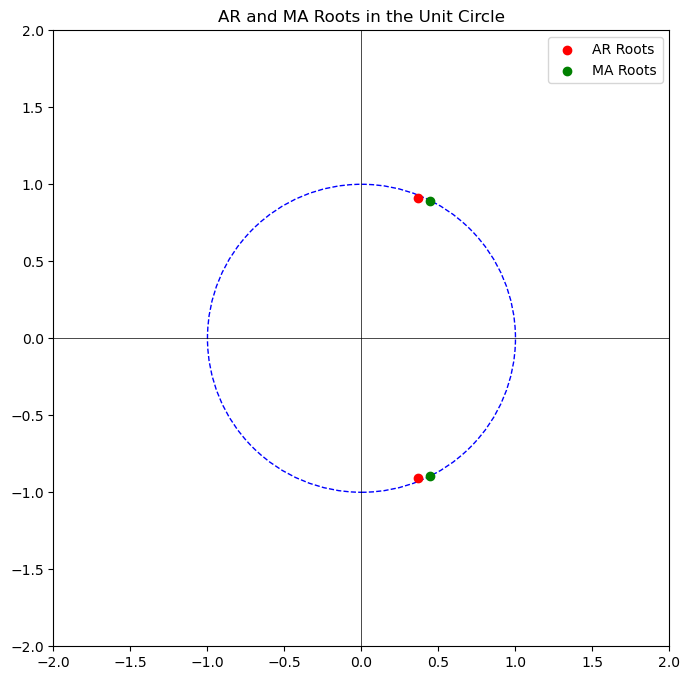

ADF Statistic: -2.849802330399968
p-value: 0.05150444956029698


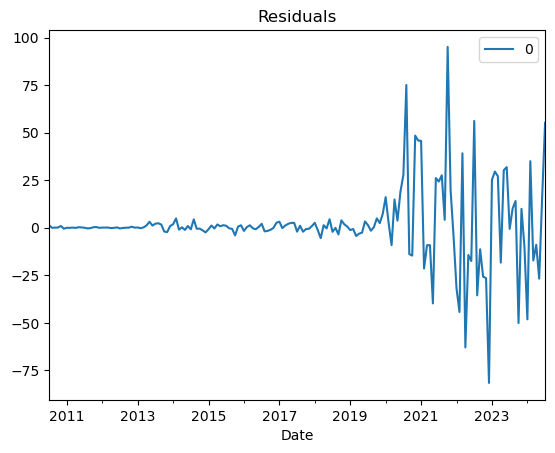

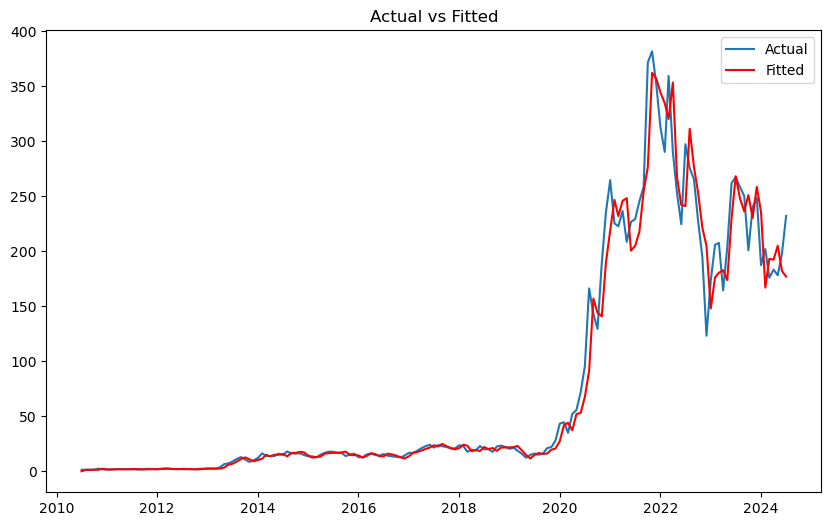

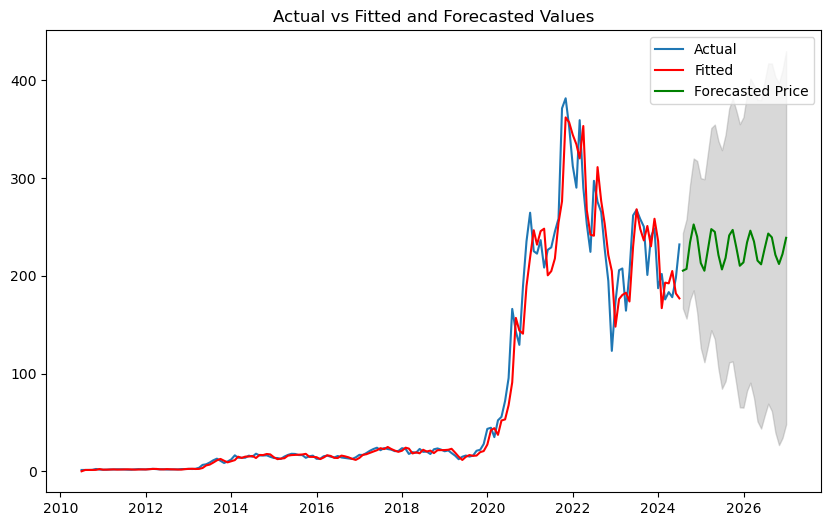

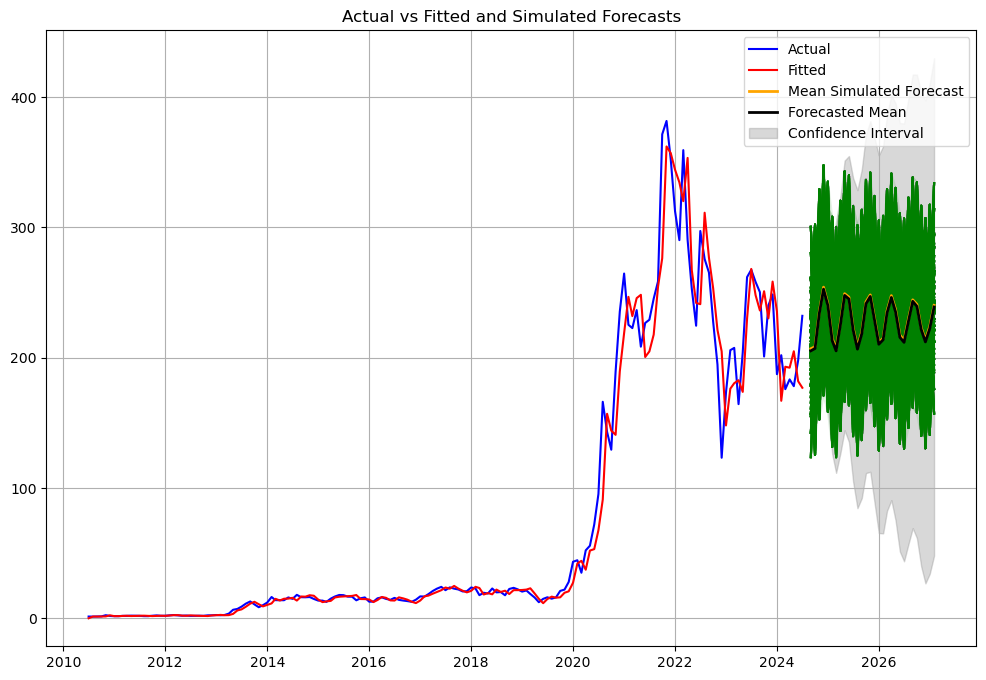

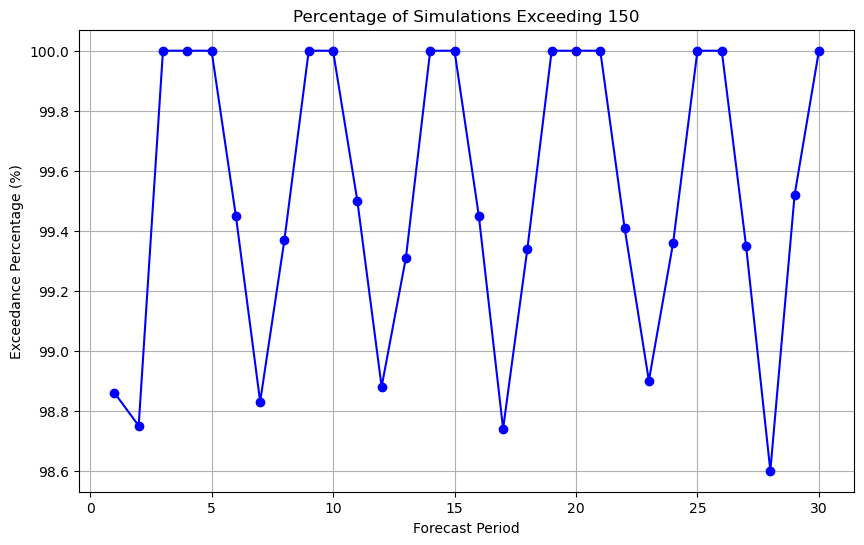

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

class StockARIMAForecaster:
    def __init__(self, p_value_threshold, ticker, start_date, end_date, interval, num_simulations, forecast_periods, threshold_value):
        self.p_value_threshold = p_value_threshold
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.interval = interval
        self.num_simulations = num_simulations
        self.forecast_periods = forecast_periods
        self.threshold_value = threshold_value
        self.data = None
        self.data_diff = None
        self.best_model = None
        self.best_order = None
    
    def fetch_data(self):
        self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date, interval=self.interval)['Close']
        self.data_diff = self.data.diff().dropna()
    
    def plot_acf_pacf(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plot_acf(self.data_diff, ax=plt.gca(), lags=40)
        plt.title('Autocorrelation Function (ACF)')
        plt.subplot(122)
        plot_pacf(self.data_diff, ax=plt.gca(), lags=40)
        plt.title('Partial Autocorrelation Function (PACF)')
        plt.show()

    def find_best_arima_model(self):
        p_range = range(0, 6)
        d_range = range(0, 2)
        q_range = range(0, 6)
        best_aic = np.inf
        best_bic = np.inf

        for p in p_range:
            for d in d_range:
                for q in q_range:
                    try:
                        model = ARIMA(self.data, order=(p, d, q)).fit()
                        current_aic = model.aic
                        current_bic = model.bic

                        significant_terms = model.pvalues[model.pvalues < self.p_value_threshold].count() == len(model.pvalues)
                        
                        if current_aic < best_aic and significant_terms:
                            best_aic = current_aic
                            best_bic = current_bic
                            self.best_order = (p, d, q)
                            self.best_model = model
                        print(f"ARIMA({p},{d},{q}) - AIC: {current_aic}, BIC: {current_bic}, Significant Terms: {significant_terms}")
                    
                    except Exception as e:
                        print(f"ARIMA({p},{d},{q}) failed: {e}")
                        continue

        if self.best_model is not None:
            print(f'\nBest ARIMA model: {self.best_order} with AIC: {best_aic} and BIC: {best_bic}')
        else:
            print("No suitable ARIMA model found.")
    
    def display_model_diagnostics(self):
        if self.best_model is not None:
            print(self.best_model.summary())
            self.best_model.plot_diagnostics(figsize=(15,8))
            plt.show()
    
    def plot_ar_ma_roots(self):
        if self.best_model is not None and self.best_order[0] > 0:
            ar_params = np.r_[1, -self.best_model.arparams] if self.best_order[0] > 0 else [1]
            ma_params = np.r_[1, self.best_model.maparams] if self.best_order[2] > 0 else [1]
            ar_roots = np.roots(ar_params)
            ma_roots = np.roots(ma_params)

            plt.figure(figsize=(8, 8))
            unit_circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
            plt.gca().add_patch(unit_circle)
            plt.scatter(ar_roots.real, ar_roots.imag, color='red', label='AR Roots')
            plt.scatter(ma_roots.real, ma_roots.imag, color='green', label='MA Roots')
            plt.axhline(0, color='black', linewidth=0.5)
            plt.axvline(0, color='black', linewidth=0.5)
            plt.xlim(-2, 2)
            plt.ylim(-2, 2)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.title('AR and MA Roots in the Unit Circle')
            plt.legend()
            plt.show()

    def adf_test(self):
        adf_result = sm.tsa.adfuller(self.data_diff)
        print(f'ADF Statistic: {adf_result[0]}')
        print(f'p-value: {adf_result[1]}')

    def plot_residuals(self):
        if self.best_model is not None:
            residuals = pd.DataFrame(self.best_model.resid)
            residuals.plot(title="Residuals")
            plt.show()

    def plot_actual_vs_fitted(self):
        if self.best_model is not None:
            plt.figure(figsize=(10, 6))
            plt.plot(self.data, label='Actual')
            plt.plot(self.best_model.fittedvalues, color='red', label='Fitted')
            plt.legend()
            plt.title('Actual vs Fitted')
            plt.show()
    
    def forecast(self):
        if self.best_model is not None:
            forecast_steps = self.forecast_periods
            forecast = self.best_model.get_forecast(steps=forecast_steps)
            forecast_index = pd.date_range(start=self.data.index[-1], periods=forecast_steps, freq='M')
            
            plt.figure(figsize=(10, 6))
            plt.plot(self.data, label='Actual')
            plt.plot(self.best_model.fittedvalues, color='red', label='Fitted')
            plt.plot(forecast_index, forecast.predicted_mean, color='green', label='Forecasted Price')
            plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='gray', alpha=0.3)
            plt.legend()
            plt.title('Actual vs Fitted and Forecasted Values')
            plt.show()

    def simulate_forecasts(self):
        if self.best_model is not None:
            forecast = self.best_model.get_forecast(steps=self.forecast_periods)
            forecast_mean = forecast.predicted_mean
            residuals = self.best_model.resid
            simulations = []

            for _ in range(self.num_simulations):
                simulated_values = forecast_mean + np.random.choice(residuals, size=self.forecast_periods, replace=True)
                simulations.append(simulated_values)
            
            simulations = np.array(simulations)
            exceed_percentages = (simulations > self.threshold_value).mean(axis=0) * 100

            forecast_index = pd.date_range(start=self.data.index[-1] + pd.DateOffset(months=1), periods=self.forecast_periods, freq='M')

            plt.figure(figsize=(12, 8))
            plt.plot(self.data, label='Actual', color='blue')
            plt.plot(self.best_model.fittedvalues, color='red', label='Fitted')
            
            for i in range(simulations.shape[0]):
                plt.plot(forecast_index, simulations[i], color='green', alpha=0.1)
            
            mean_simulation = simulations.mean(axis=0)
            plt.plot(forecast_index, mean_simulation, color='orange', label='Mean Simulated Forecast', linewidth=2)

            conf_int = forecast.conf_int()
            plt.plot(forecast_index, forecast.predicted_mean, color='black', label='Forecasted Mean', linewidth=2)
            plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

            plt.legend()
            plt.title('Actual vs Fitted and Simulated Forecasts')
            plt.grid()
            plt.show()

            plt.figure(figsize=(10, 6))
            plt.plot(range(1, self.forecast_periods + 1), exceed_percentages, marker='o', linestyle='-', color='blue')
            plt.title(f'Percentage of Simulations Exceeding {self.threshold_value}')
            plt.xlabel('Forecast Period')
            plt.ylabel('Exceedance Percentage (%)')
            plt.grid(True)
            plt.show()

# Usage
forecaster = StockARIMAForecaster(
    p_value_threshold=0.05, 
    ticker='TSLA', 
    start_date='2010-01-01', 
    end_date='2024-07-31', 
    interval='1mo', 
    num_simulations=10000, 
    forecast_periods=30, 
    threshold_value=150
)

# Run the methods
forecaster.fetch_data()
forecaster.plot_acf_pacf()
forecaster.find_best_arima_model()
forecaster.display_model_diagnostics()
forecaster.plot_ar_ma_roots()
forecaster.adf_test()
forecaster.plot_residuals()
forecaster.plot_actual_vs_fitted()
forecaster.forecast()
forecaster.simulate_forecasts()

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error

class ARIMAStockForecasting:
    def __init__(self, ticker, start_date, end_date, interval, num_simulations, forecast_periods, threshold_value, p_value_threshold):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.interval = interval
        self.num_simulations = num_simulations
        self.forecast_periods = forecast_periods
        self.threshold_value = threshold_value
        self.p_value_threshold = p_value_threshold
        self.data = None
        self.data_diff = None
        self.best_model = None
        self.best_order = None
    
    def fetch_data(self):
        self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date, interval=self.interval)['Close']
        self.data_diff = self.data.diff().dropna()

    def plot_acf_pacf(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plot_acf(self.data_diff, ax=plt.gca(), lags=40)
        plt.title('Autocorrelation Function (ACF)')
        plt.subplot(122)
        plot_pacf(self.data_diff, ax=plt.gca(), lags=40)
        plt.title('Partial Autocorrelation Function (PACF)')
        plt.show()
    
    def fit_arima_model(self):
        p_range = range(0, 6)
        d_range = range(0, 2)
        q_range = range(0, 6)

        best_aic = np.inf
        best_bic = np.inf

        for p in p_range:
            for d in d_range:
                for q in q_range:
                    try:
                        model = ARIMA(self.data, order=(p, d, q)).fit()
                        current_aic = model.aic
                        current_bic = model.bic
                        significant_terms = model.pvalues[model.pvalues < self.p_value_threshold].count() == len(model.pvalues)

                        if current_aic < best_aic and significant_terms:
                            best_aic = current_aic
                            best_bic = current_bic
                            self.best_order = (p, d, q)
                            self.best_model = model
                        print(f"ARIMA({p},{d},{q}) - AIC: {current_aic}, BIC: {current_bic}, Significant Terms: {significant_terms}")
                    except Exception as e:
                        print(f"ARIMA({p},{d},{q}) failed: {e}")
                        continue

        if self.best_model is not None:
            print(f"\nBest ARIMA model: {self.best_order} with AIC: {best_aic} and BIC: {best_bic}")
        else:
            print("No suitable ARIMA model found.")
    
    def plot_diagnostics(self):
        if self.best_model is not None:
            print(self.best_model.summary())
            self.best_model.plot_diagnostics(figsize=(15, 8))
            plt.show()

    def calculate_error_metrics(self):
        if self.best_model is not None:
            # Align the lengths of actual and fitted values
            actual = self.data[self.best_model.fittedvalues.index]  # Aligning the actual values with fitted values index
            fitted = self.best_model.fittedvalues
            
            # Calculate error metrics
            mse = mean_squared_error(actual, fitted)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(actual, fitted)
            mape = np.mean(np.abs((actual - fitted) / actual)) * 100
            
            print(f"MSE: {mse}")
            print(f"RMSE: {rmse}")
            print(f"MAE: {mae}")
            print(f"MAPE: {mape}%")
    
    def plot_residuals(self):
        if self.best_model is not None:
            residuals = pd.DataFrame(self.best_model.resid)
            residuals.plot(title="Residuals")
            plt.show()

    def forecast(self):
        if self.best_model is not None:
            forecast_steps = self.forecast_periods
            forecast = self.best_model.get_forecast(steps=forecast_steps)
            forecast_index = pd.date_range(start=self.data.index[-1], periods=forecast_steps, freq='M')

            plt.figure(figsize=(10, 6))
            plt.plot(self.data, label='Actual')
            plt.plot(self.best_model.fittedvalues, color='red', label='Fitted')
            plt.plot(forecast_index, forecast.predicted_mean, color='green', label='Forecasted Price')
            plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='gray', alpha=0.3)
            plt.legend()
            plt.title('Actual vs Fitted and Forecasted Values')
            plt.show()

    def simulate_predictions(self):
        if self.best_model is not None:
            forecast = self.best_model.get_forecast(steps=self.forecast_periods)
            forecast_mean = forecast.predicted_mean
            forecast_se = forecast.se_mean
            residuals = self.best_model.resid

            simulations = []
            for i in range(self.num_simulations):
                simulated_values = forecast_mean + np.random.choice(residuals, size=self.forecast_periods, replace=True)
                simulations.append(simulated_values)
            
            simulations = np.array(simulations)
            exceed_percentages = (simulations > self.threshold_value).mean(axis=0) * 100
            simulation_df = pd.DataFrame(simulations, columns=[f"Period {i+1}" for i in range(self.forecast_periods)])
            exceed_df = pd.DataFrame({"Period": range(1, self.forecast_periods + 1), "Exceed %": exceed_percentages})

            forecast_index = pd.date_range(start=self.data.index[-1] + pd.DateOffset(months=1), periods=self.forecast_periods, freq='M')

            plt.figure(figsize=(12, 8))
            plt.plot(self.data, label='Actual', color='blue')
            plt.plot(self.best_model.fittedvalues, color='red', label='Fitted')

            for i in range(simulation_df.shape[0]):
                plt.plot(forecast_index, simulation_df.iloc[i], color='green', alpha=0.1)

            mean_simulation = simulation_df.mean(axis=0)
            plt.plot(forecast_index, mean_simulation, color='orange', label='Mean Simulated Forecast', linewidth=2)

            conf_int = forecast.conf_int()
            plt.plot(forecast_index, forecast.predicted_mean, color='black', label='Forecasted Mean', linewidth=2)
            plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

            plt.legend()
            plt.title('Actual vs Fitted and Simulated Forecasts')
            plt.xlabel('Date')
            plt.ylabel('Value')
            plt.xticks(rotation=45)
            plt.grid()
            plt.show()

            plt.figure(figsize=(10, 6))
            plt.plot(exceed_df['Period'], exceed_df['Exceed %'], marker='o', linestyle='-', color='blue')
            plt.title(f'Percentage of Simulations Exceeding {self.threshold_value}')
            plt.xlabel('Forecast Period')
            plt.ylabel('Exceedance Percentage (%)')
            plt.grid(True)
            plt.show()

    def run(self):
        self.fetch_data()
        self.plot_acf_pacf()
        self.fit_arima_model()
        self.plot_diagnostics()
        self.calculate_error_metrics()
        self.plot_residuals()
        self.forecast()
        self.simulate_predictions()

[*********************100%***********************]  1 of 1 completed


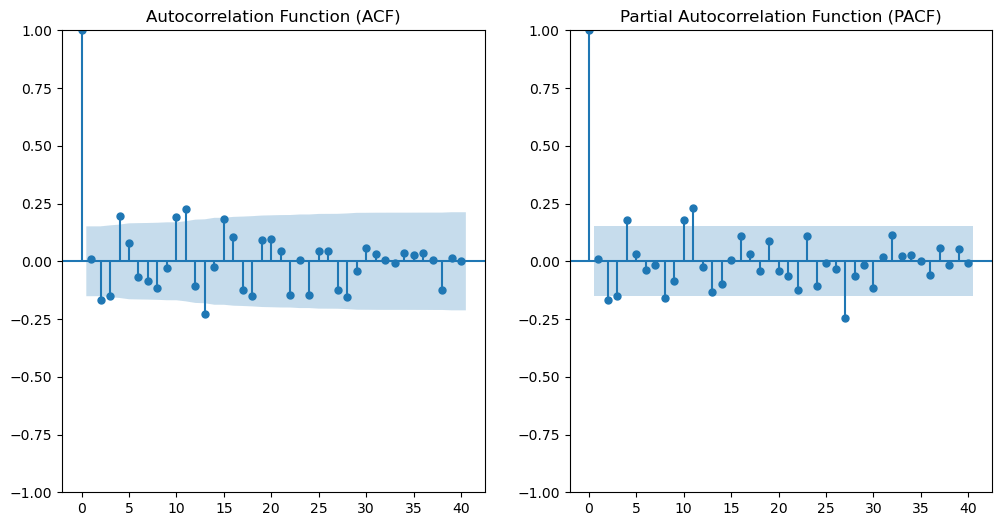

ARIMA(0,0,0) - AIC: 2053.948625590052, BIC: 2060.208423019898, Significant Terms: True
ARIMA(0,0,1) - AIC: 1871.0042128395653, BIC: 1880.3939089843345, Significant Terms: True
ARIMA(0,0,2) - AIC: 1743.493355196515, BIC: 1756.0129500562073, Significant Terms: True
ARIMA(0,0,3) - AIC: 1699.33785413525, BIC: 1714.9873477098654, Significant Terms: True
ARIMA(0,0,4) - AIC: 1701.2746326176102, BIC: 1720.0540249071487, Significant Terms: False
ARIMA(0,0,5) - AIC: 1646.3489544240738, BIC: 1668.2582454285352, Significant Terms: True
ARIMA(0,1,0) - AIC: 1513.0326103353145, BIC: 1516.1565743147178, Significant Terms: True
ARIMA(0,1,1) - AIC: 1514.9921835741345, BIC: 1521.240111532941, Significant Terms: False
ARIMA(0,1,2) - AIC: 1513.5535477424382, BIC: 1522.925439680648, Significant Terms: False
ARIMA(0,1,3) - AIC: 1511.3884111876982, BIC: 1523.8842671053112, Significant Terms: False
ARIMA(0,1,4) - AIC: 1508.5129337570988, BIC: 1524.132753654115, Significant Terms: False
ARIMA(0,1,5) - AIC: 1510

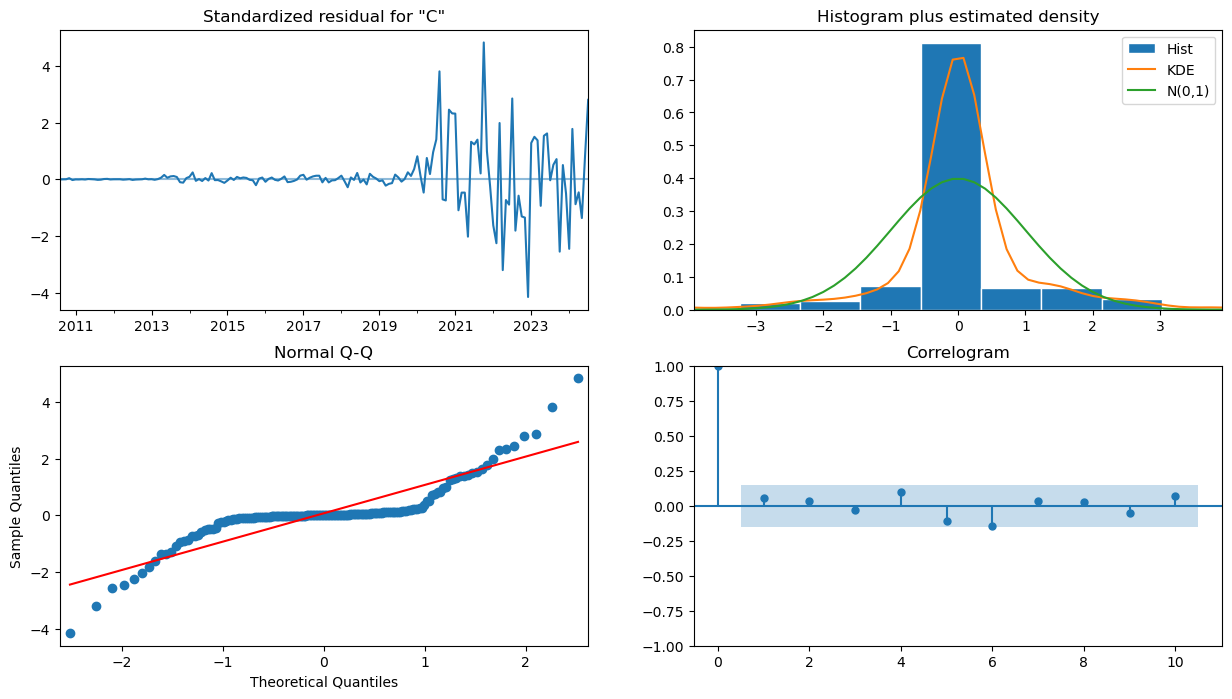

MSE: 387.2900264314444
RMSE: 19.67968562836928
MAE: 9.9483344564171
MAPE: 12.713116806833202%


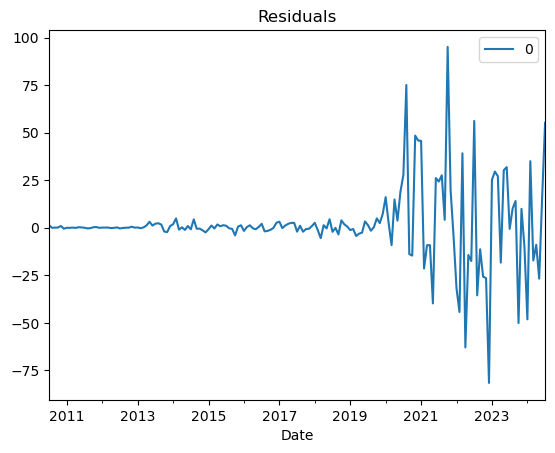

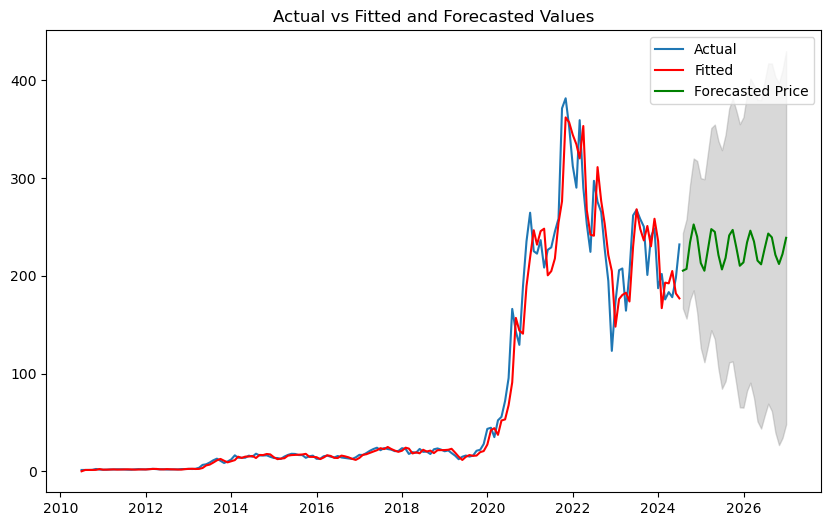

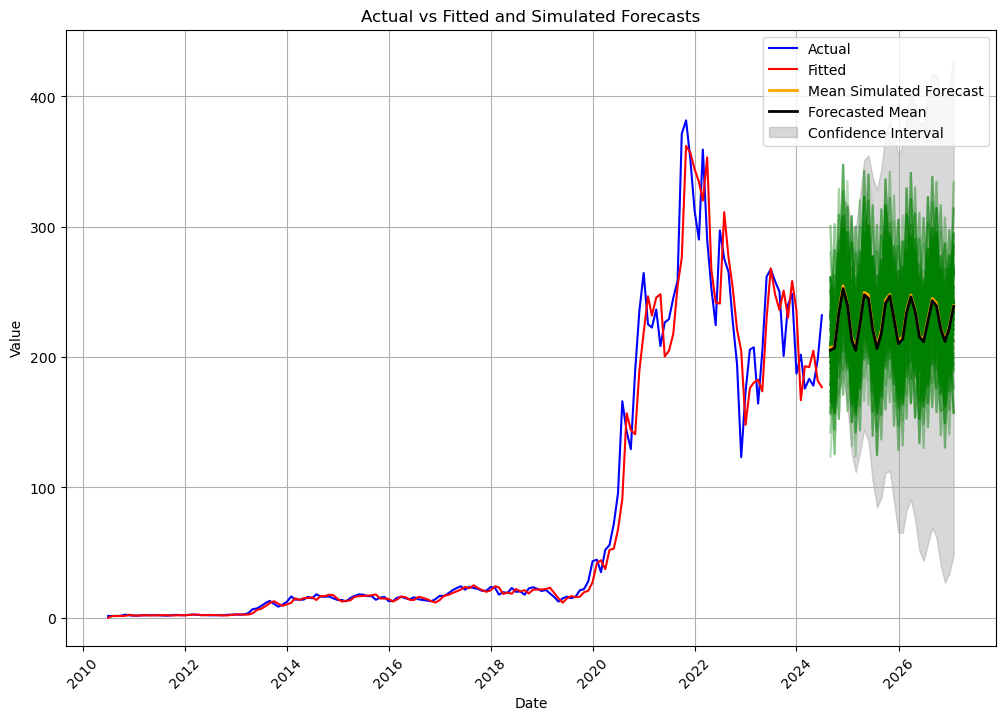

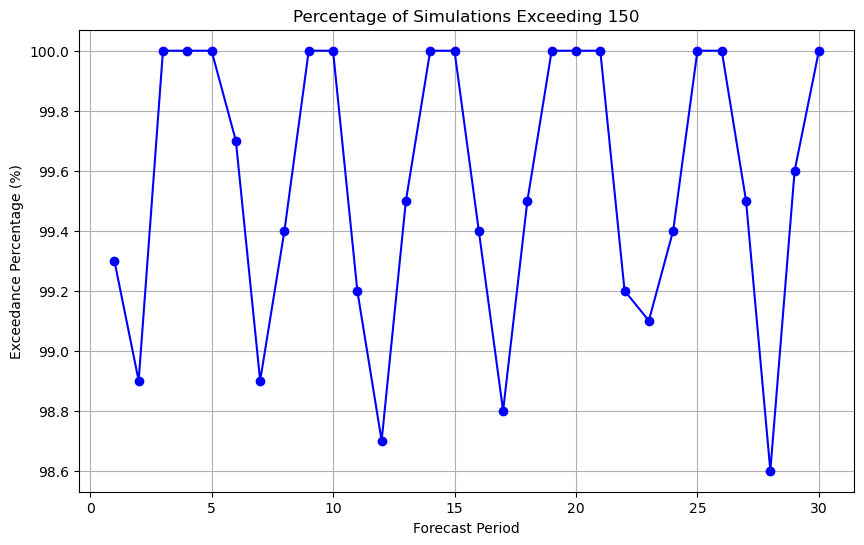

In [87]:
model = ARIMAStockForecasting(
    ticker='TSLA',
    start_date='2010-01-01',
    end_date='2024-07-31',
    interval='1mo',
    num_simulations=1000,
    forecast_periods=30,
    threshold_value=150,
    p_value_threshold=0.05
)

model.run()